# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import io
from google.colab import files
#i tried my best but am only able to make upload file work all other ways were not working on google colab
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [2]:
data_to_train = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

data_to_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data_to_train.isnull().sum()
#no Missing value so we are not filling anything

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
data_to_train.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
data_to_train.shape

x = (data_to_train.loc[:, data_to_train.columns != 'Concrete compressive strength(MPa, megapascals) '])
y = (data_to_train.loc[:, data_to_train.columns == 'Concrete compressive strength(MPa, megapascals) '])
train_ratio = 0.5
validation_ratio = 0.20
test_ratio = 0.30
from sklearn.model_selection import train_test_split
# train is now 50% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
print("train")
print(x_train)
print("test")
print(x_test)
print("validation")
print( x_val )


train
      Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
88                                        362.6  ...          3
68                                        190.0  ...         28
654                                       122.6  ...         28
223                                       166.1  ...        100
151                                       401.8  ...         56
...                                         ...  ...        ...
1029                                      260.9  ...         28
269                                       231.8  ...          3
487                                       387.0  ...         28
19                                        475.0  ...        180
258                                       212.5  ...        100

[515 rows x 8 columns]
test
     Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
997                                      310.0  ...         28
548                                      289.0  ...         28
648     

In [ ]:
# Normalizing the data

mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std

In [6]:
x_train.values

array([[ 362.6,  189. ,    0. , ...,  944.7,  755.8,    3. ],
       [ 190. ,  190. ,    0. , ...,  932. ,  670. ,   28. ],
       [ 122.6,  183.9,    0. , ...,  958.2,  800.1,   28. ],
       ...,
       [ 387. ,   20. ,   94. , ...,  938. ,  845. ,   28. ],
       [ 475. ,    0. ,    0. , ...,  932. ,  594. ,  180. ],
       [ 212.5,    0. ,  100.4, ..., 1007.8,  903.6,  100. ]])

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape =(8,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [24]:
model=build_model()

In [25]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_val, y_val))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 301426.1936 - mae: 409.1138 - val_loss: 1151.3430 - val_mae: 27.3632
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 95242.8650 - mae: 225.0019 - val_loss: 565.0766 - val_mae: 18.7571
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 55418.5575 - mae: 177.5352 - val_loss: 1461.6825 - val_mae: 33.5767
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 33110.0205 - mae: 134.8872 - val_loss: 1671.4188 - val_mae: 37.0410
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 16320.4818 - mae: 99.5511 - val_loss: 1600.7032 - val_mae: 36.3456
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 11207.2502 - mae: 79.7607 - val_loss: 1555.3176 - val_mae: 35.8365
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 7638.1874 - mae: 68.5526 - val_loss: 1549.9202 - val_mae: 35.8525
Epoch 8/100
17/1

In [26]:
historyTest=model.fit(x_test,y_test,epochs=100,validation_data=(x_val, y_val))

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 524.3497 - mae: 17.8638 - val_loss: 624.4150 - val_mae: 21.3436
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 400.3264 - mae: 15.8402 - val_loss: 488.9639 - val_mae: 18.4061
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 421.0983 - mae: 16.0640 - val_loss: 523.8372 - val_mae: 19.2110
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 512.4684 - mae: 17.9349 - val_loss: 664.6878 - val_mae: 22.1675
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 485.9918 - mae: 17.0886 - val_loss: 553.9315 - val_mae: 19.8276
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 483.2418 - mae: 16.5967 - val_loss: 594.8298 - val_mae: 20.7063
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 482.6234 - mae: 16.8096 - val_loss: 669.7022 - val_mae: 22.2353
Epoch 8/100
10/10 [=====================

In [27]:
y_pred = model.predict(x_test)
print(y_pred)


[[19.466]
 [11.534]
 [10.109]
 [25.619]
 [13.116]
 [ 8.703]
 [19.742]
 [23.694]
 [12.941]
 [10.7  ]
 [15.031]
 [ 8.912]
 [12.015]
 [25.051]
 [ 6.63 ]
 [11.51 ]
 [21.924]
 [23.689]
 [13.208]
 [22.52 ]
 [13.905]
 [11.012]
 [17.504]
 [22.534]
 [15.022]
 [23.692]
 [13.721]
 [22.359]
 [ 7.563]
 [19.132]
 [14.718]
 [18.109]
 [ 9.69 ]
 [13.047]
 [11.694]
 [12.471]
 [27.491]
 [28.984]
 [26.76 ]
 [16.91 ]
 [23.851]
 [22.758]
 [13.427]
 [15.639]
 [10.882]
 [13.804]
 [16.597]
 [14.396]
 [14.73 ]
 [13.323]
 [12.984]
 [12.171]
 [14.539]
 [22.508]
 [14.262]
 [21.35 ]
 [24.451]
 [15.513]
 [16.846]
 [20.153]
 [15.863]
 [28.543]
 [12.666]
 [13.647]
 [ 7.298]
 [10.469]
 [17.308]
 [23.466]
 [17.742]
 [16.58 ]
 [11.235]
 [19.994]
 [16.187]
 [ 9.229]
 [13.605]
 [11.12 ]
 [ 7.067]
 [16.832]
 [22.508]
 [14.228]
 [13.012]
 [11.832]
 [11.041]
 [15.091]
 [16.903]
 [11.197]
 [10.936]
 [ 5.316]
 [13.657]
 [27.811]
 [16.208]
 [13.837]
 [15.858]
 [17.244]
 [28.542]
 [16.644]
 [ 9.533]
 [18.904]
 [11.247]
 [18.86 ]


In [28]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

17/17 [==============================] - 0s 1ms/step - loss: 526.8344 - mae: 19.1254
mae: 19.13%
10/10 [==============================] - 0s 2ms/step - loss: 526.7623 - mae: 19.5740
mae: 19.57%


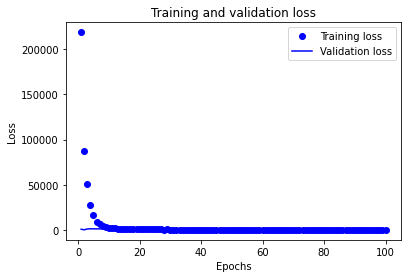

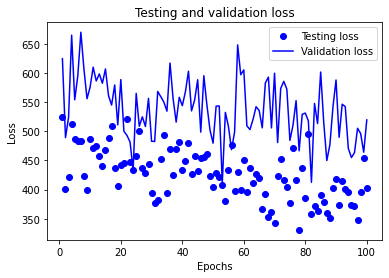

In [29]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Plotting the Testing and validation loss
import matplotlib.pyplot as plt
loss = historyTest.history['loss']
val_loss = historyTest.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Testing loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Testing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

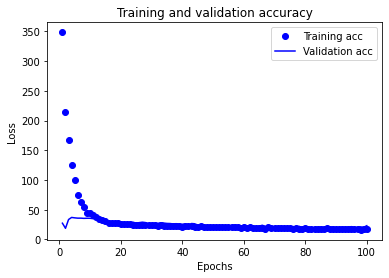

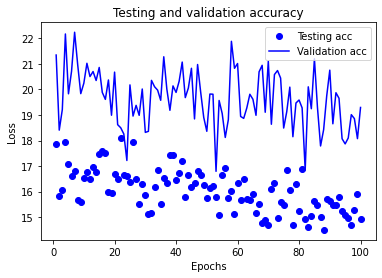

In [30]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Plotting the Testing and validation accuracy
plt.clf()
acc = historyTest.history['mae']
val_acc = historyTest.history['val_mae']
plt.plot(epochs, acc, 'bo', label='Testing acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Testing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()